In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [71]:
# Read the data from the CSV file into a pandas DataFrame
df = pd.read_csv('Resources/dataset-long.csv')

### List Genres based on their average popularity

Text(0.5, 1.0, 'Average Popularity of Genres')

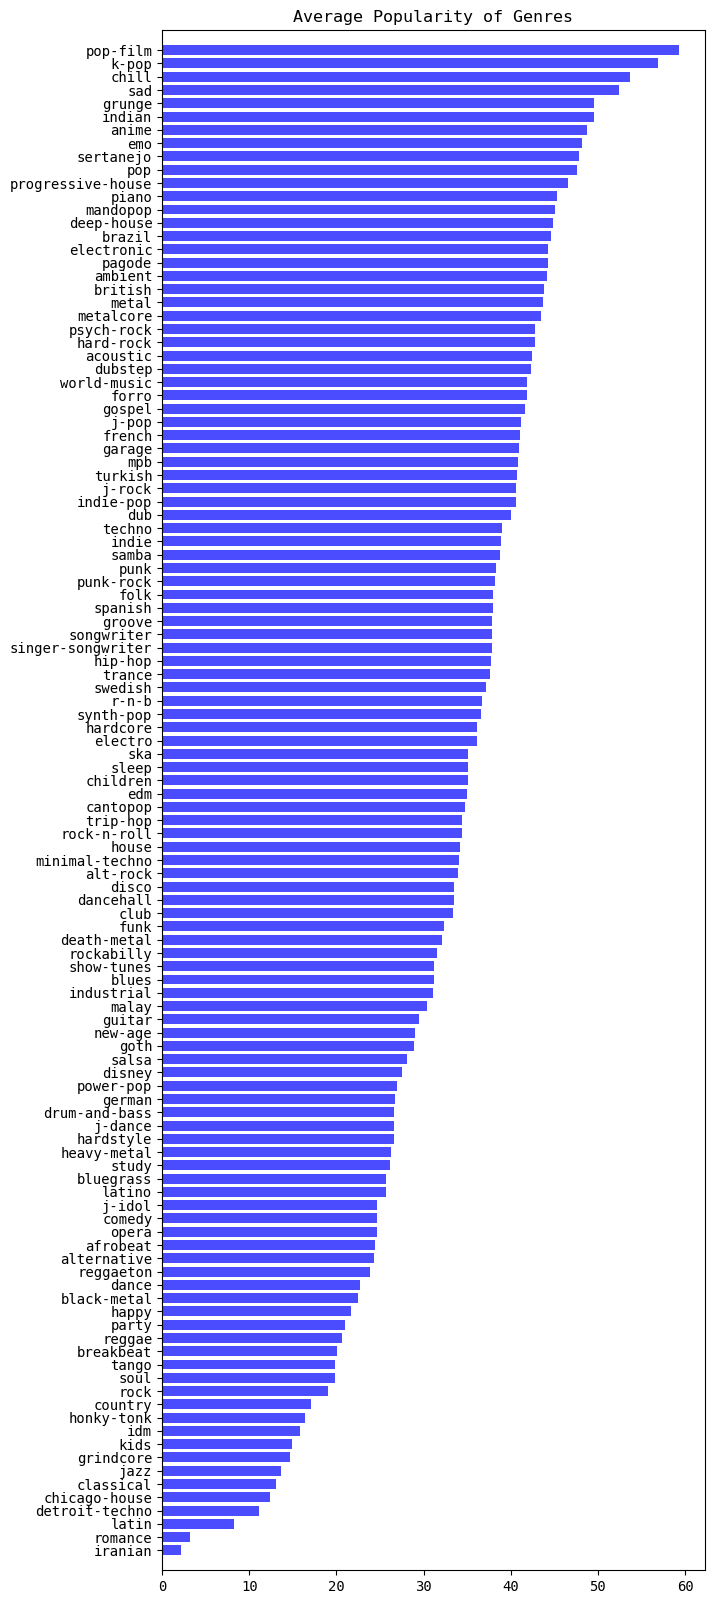

In [72]:
# Define the font properties (family, weight, size)

plt.rcParams['font.family'] = ['monospace', 'sans', 'sans-serif', 'serif']

df['track_genre'] = df['track_genre'].str.replace('$$', '', regex=False)

avg_Gpopularity = df.groupby('track_genre')['popularity'].mean()

# Sort the genres based on their average popularity in descending order
sorted_genres = avg_Gpopularity.sort_values(ascending=True)

# Sort the Genres
top_genres = sorted_genres

# Plot the bar chart
bar_width = 0.75
bar_spacing = 1.5

fig, ax = plt.subplots(figsize=(7, 20))
num_genres = len(top_genres)
bar_positions = np.arange(num_genres)

total_width = bar_width + bar_spacing

ax.barh(bar_positions, top_genres.values, height=bar_width, align='center', color='blue', alpha=0.7)
ax.set_yticks(bar_positions)
ax.set_yticklabels(top_genres.index)

ax.set_ylim(bar_positions.min() - bar_spacing, bar_positions.max() + bar_spacing)

# Set the plot title and axis labels
plt.title('Average Popularity of Genres')



ANALYSIS: The names of the genres are a litel broad and can overlap. Genre rankings resulted in lesser known genres at the top with more commonly known genres toward the bottom. accounting for this being a database from an international list of ratings then it becomes more clear. 

### List Genres based on the number of Tracks with popularity equal or greater than 90

In [73]:
# Filter DB to include only those tracks with popularity >= 90
high_popularity_songs = df[df['popularity'] >= 90]

# Group the data by 'artists' and calculate the count of 'popularity'
popularity_count = high_popularity_songs.groupby('track_genre')['track_id'].count()

popularity_count2 = popularity_count.sort_values(ascending=True)



<BarContainer object of 22 artists>

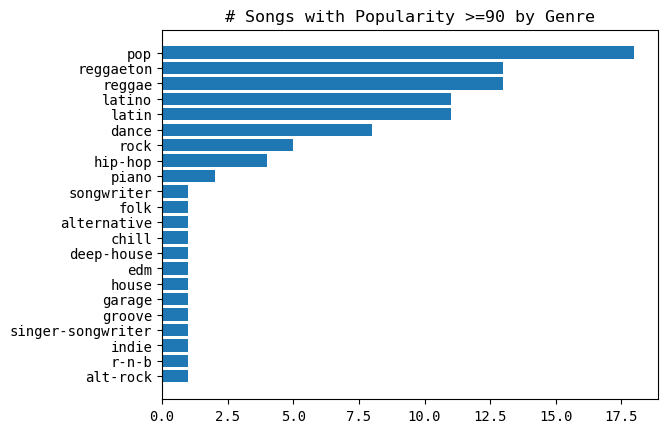

In [77]:
# Plot the bar chart
plt.title('# Songs with Popularity >=90 by Genre')
plt.barh(popularity_count2.index, popularity_count2.values)
